# Titanic Project

### project url: https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from IPython.display import Image

In [2]:
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_column', 500)
pd.set_option('display.width', 500)

In [3]:
# get current working directory
os.getcwd()

'/Users/atlantis_echo/Desktop/Kaggle-Project/03.Titanic'

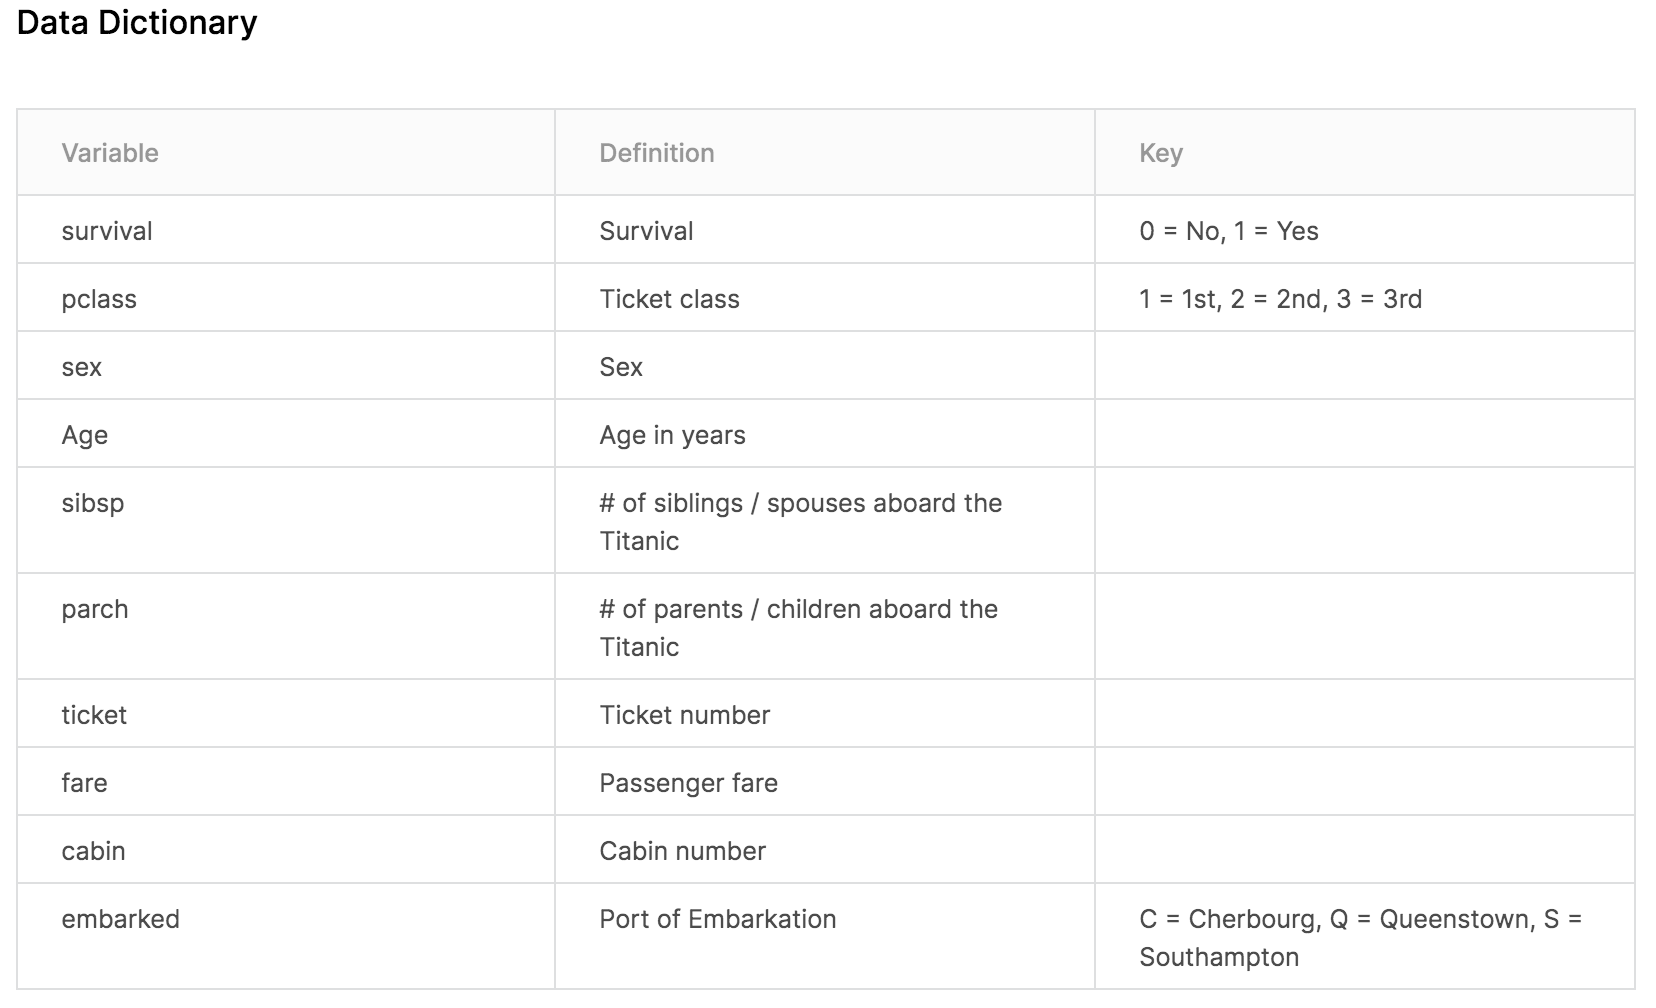

In [4]:
Image(filename = str(os.getcwd())+str('/titanic_data_description.png'))

# import data

In [259]:
# train data import path
path_train = str(os.getcwd())+str('/train.csv')

In [261]:
# train data import path
path_test = str(os.getcwd())+str('/test.csv')

In [260]:
# read train data
train_raw = pd.read_csv(path_train)

In [262]:
# read test data
test_raw = pd.read_csv(path_test)

In [8]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# check survived number
train_raw.groupby(['Survived'])['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

# Data Exploration

In [16]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
train_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train_raw['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
D                  3
F2                 3
F33                3
E101               3
C22 C26            3
C125               2
B49                2
C123               2
D36                2
E8                 2
E25                2
C68                2
B77                2
C83                2
B28                2
B20                2
F G73              2
C93                2
E67                2
B57 B59 B63 B66    2
E24                2
B51 B53 B55        2
D20                2
C124               2
C52                2
B18                2
D26                2
C78                2
F4                 2
B5                 2
D17                2
B35                2
B58 B60            2
C92                2
D35                2
E44                2
B22                2
D33                2
E33                2
C65                2
C2                 2
C126               2
E121               2
E34                1
C118         

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf5d0b8>,
      dtype=object)

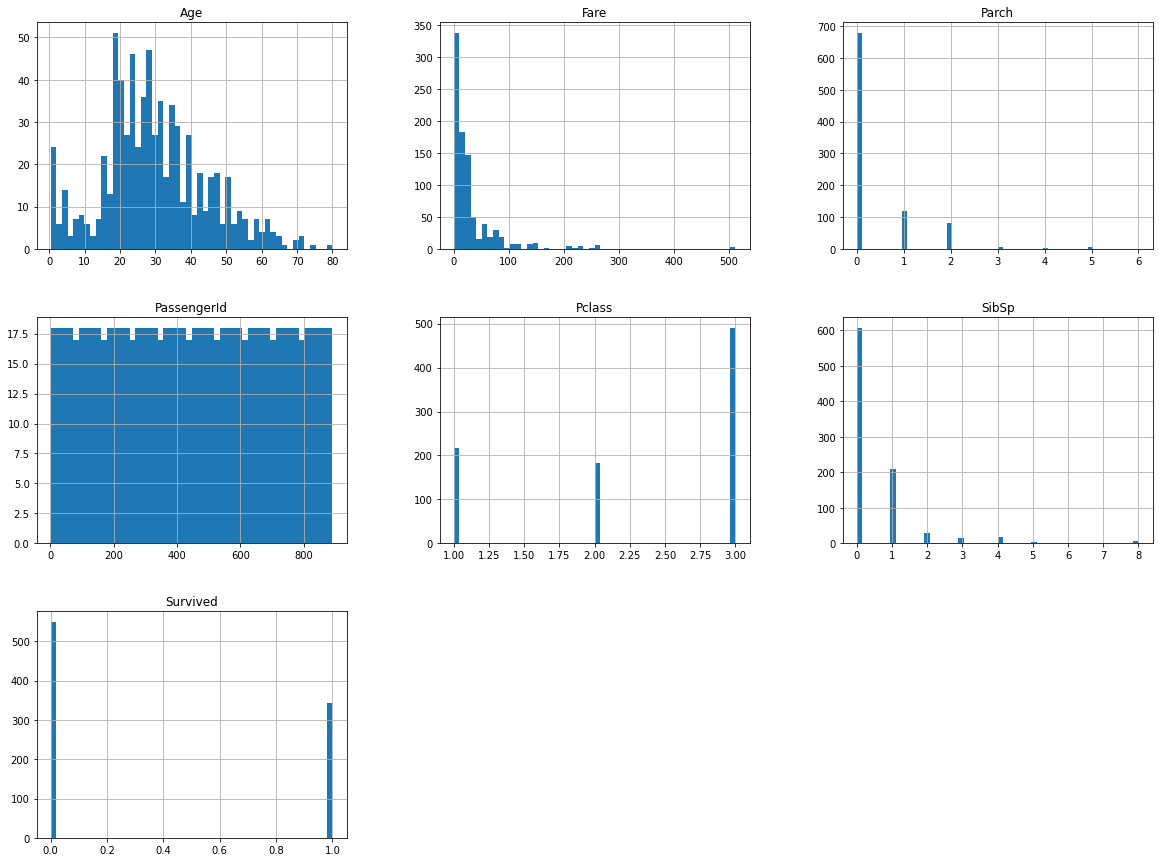

In [25]:
# histogram for data exploration 
train_raw.hist(bins = 50, figsize = (20,15))

In [30]:
train_raw['Age'].mean()

29.69911764705882

In [31]:
train_raw['Age'].median()

28.0

In [33]:
# produce Pearson's r

corr_matrix = train_raw.corr()

In [34]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Data manipulation

In [126]:
# Step 0: devide into numercial and categorical attributes
cat_attributes = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]
num_attributes = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
dropna_row_attributes = ["Embarked"]

In [138]:
# get cabin class
substr_position = 1

## Step 1: drop NA values from Embarked

In [263]:
from sklearn.preprocessing import FunctionTransformer

def dropna_for_rows(df, column_names):
    df_new = df.copy()
    df_new = df_new.dropna(subset = column_names)
    return df_new

na_dropper = FunctionTransformer(dropna_for_rows, validate=False
                                ,kw_args={"column_names": dropna_row_attributes}
                                )

# train_new = na_dropper.fit_transform(train_raw)

In [137]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


train_new = dropna_for_rows(df = train_raw, column_names = ['Embarked'])

## Step 2: grouped NA Cabin into one group

In [329]:
train_cat = train_new.drop(num_attributes, axis = 1)

In [330]:
train_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         889 non-null    object
 1   Sex          889 non-null    object
 2   Ticket       889 non-null    object
 3   Cabin        889 non-null    object
 4   Embarked     889 non-null    object
 5   Cabin_Class  889 non-null    object
dtypes: object(6)
memory usage: 41.8+ KB


In [331]:
# replace NA age by median
# remember using simpleimputer, pass into a dataframe, and with only numerical data

from sklearn.impute import SimpleImputer 

# age = train_raw['Age'].copy()
cabin_imputer = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value = "Non")
train_cat = train_new.drop(num_attributes, axis = 1)
cabin_imputer.fit(train_cat)

# Impute all missing values in dataframe using the same strategy, but this convert dataframe into a ndarray
X = cabin_imputer.transform(train_cat)

# convert the ndarry back to dataframe, columns should be right chosen!
train_cats = pd.DataFrame(X, columns = train_cat.columns)

In [332]:
train_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      889 non-null    object
 1   Sex       889 non-null    object
 2   Ticket    889 non-null    object
 3   Cabin     889 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


## Step 3: cabin_sub, extract cabin class (i.e. A,B,C)

from sklearn.preprocessing import FunctionTransformer

def extract_cabin_class(df, substr_position = 1):
    
    # add new column Cabin_Class
    df['Cabin_Class'] = df['Cabin'][:1]
    
    # substr_position default to extract the first item
    for i in range(len(df['Cabin'])):
        
        if df['Cabin'][i] != 'non_cabin':
            # define Cabin Class to be the first element of Cain number
            df['Cabin_Class'][i] = df['Cabin'][i][:1]
        else:
            # if no cabin number, use non_class instead
            df['Cabin_Class'][i] = 'non_class'
    return df

            
cabin_class_adder = FunctionTransformer(extract_cabin_class, validate=False)

# df.values: Return a Numpy representation of the DataFrame.
train_cats_with_cabin_class = cabin_class_adder.fit_transform(train_cats)

In [381]:
from sklearn.preprocessing import FunctionTransformer

def extract_cabin_class(df):
    
    # add new column Cabin_Class
    Cabin_Class = train_cats['Cabin'].astype(str).str[0]
    
    return np.c_[Cabin_Class]
    
# cabin_class_adder = FunctionTransformer(extract_cabin_class, validate=False)

# df.values: Return a Numpy representation of the DataFrame.
# train_cats_with_cabin_class = cabin_class_adder.fit_transform(train_cats)

In [226]:
train_cats_with_cabin_class.head()

,Name,Sex,Ticket,Cabin,Embarked,Cabin_Class
0,"Braund, Mr. Owen Harris",male,A/5 21171,Non,S,N
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Non,S,N
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,C
4,"Allen, Mr. William Henry",male,373450,Non,S,N


In [186]:
train_cats_with_cabin_class['Cabin_Class'].value_counts()

non_class    687
C             59
B             45
D             33
E             32
A             15
F             13
G              4
T              1
Name: Cabin_Class, dtype: int64

In [162]:
train_cats_with_cabin_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         889 non-null    object
 1   Sex          889 non-null    object
 2   Ticket       889 non-null    object
 3   Cabin        889 non-null    object
 4   Embarked     889 non-null    object
 5   Cabin_Class  889 non-null    object
dtypes: object(6)
memory usage: 41.8+ KB


## Step 4: median replace age

In [118]:
# replace NA age by median
# remember using simpleimputer, pass into a dataframe, and with only numerical data

from sklearn.impute import SimpleImputer 

# age = train_raw['Age'].copy()
age_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
train_num = train_new.drop(cat_attributes, axis = 1)
age_imputer.fit(train_num)

# Impute all missing values in dataframe using the same strategy, but this convert dataframe into a ndarray
X = age_imputer.transform(train_num)

# convert the ndarry back to dataframe, columns should be right chosen!
train_nums = pd.DataFrame(X, columns = train_num.columns)

In [119]:
train_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Pclass       889 non-null    float64
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    float64
 5   Parch        889 non-null    float64
 6   Fare         889 non-null    float64
dtypes: float64(7)
memory usage: 48.7 KB


# Pipeline construction

In [405]:
# train data import path
path_train = str(os.getcwd())+str('/train.csv')

# read train data
train_raw = pd.read_csv(path_train)

## Pipeline to realize:
    Step 1: drop rows with null Embarked 
    Step 2: impute age by its median
    Step 3: substitute null cabin information by 'Non'
    Step 4: construct cabine class by Cabin column's first element

In [406]:
# Step 0: devide into numercial and categorical attributes
train_label_column = 'Survived'

cat_attributes = ["Sex", "Ticket", "Cabin", "Embarked"]
num_attributes = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
dropna_row_attributes = ["Embarked"]
cabin_class_attributes = ['Cabin']
all_attributes = num_attributes + cat_attributes + ['Cabin_Class']

## pipeline functions

In [407]:
from sklearn.preprocessing import FunctionTransformer

# for Step 1: drop rows
def dropna_for_rows(df, column_names):
    df_new = df.copy()
    df_new = df_new.dropna(subset = column_names)
    return df_new

def extract_cabin_class(df):
    
    # add new column Cabin_Class
    Cabin_Class = train_cats['Cabin'].astype(str).str[0]
    
    return np.c_[Cabin_Class]
# for Step 2: impute age by its median
# and Step 3: impute Cabin by 'Non'
# done by Sklearn simpleImputer



In [408]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

    
    
train_new = na_dropper.fit_transform(train_raw)   
train_label = train_new['Survived'].copy()
train_new = train_new.drop(['Survived', 'PassengerId', 'Name'], axis = 1)
# train_new['Cabin_Class'] = ''

full_pipeline =\
    ColumnTransformer([
                    ('age_imputer', SimpleImputer(strategy='median')
                                            , num_attributes)
                    , ('cabin_imputer', SimpleImputer(strategy='constant', fill_value = "Non")
                                            , cat_attributes)
                    , ('cabin_class_adder', FunctionTransformer(extract_cabin_class, validate=False
                                                               )
                                            , cabin_class_attributes)
                    ,
])

train_prepared = full_pipeline.fit_transform(train_new)

In [409]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Ticket    889 non-null    object 
 6   Fare      889 non-null    float64
 7   Cabin     202 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 69.5+ KB


In [410]:
train_new.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


In [411]:
pd.DataFrame(train_prepared).head()

,0,1,2,3,4,5,6,7,8,9
0,3,22,1,0,7.25,male,A/5 21171,Non,S,N
1,1,38,1,0,71.2833,female,PC 17599,C85,C,C
2,3,26,0,0,7.925,female,STON/O2. 3101282,Non,S,N
3,1,35,1,0,53.1,female,113803,C123,S,C
4,3,35,0,0,8.05,male,373450,Non,S,N


In [412]:
train_prepared.shape

(889, 10)

In [413]:
len(train_new.columns)

9